<a href="https://colab.research.google.com/github/8noira/mysite/blob/master/prml_report_week2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Pattern Recognition Report
Department of Advanced Mathematical Sciences

6930320070 Yuki Matsuda

In this case, we performed a linear regression on two different data sets. The first file to be submitted is a regular linear regression and the second is a regression using a non-linear function as the basis.

# Data set used
Ordinary linear regression
We used the Boston Housing dataset; all 13 features were used to predict building prices.
(Features: crime rate, percentage of residential land above a certain value, percentage of non-retailers, presence of river, nitrous oxide concentration, average number of rooms, age ratio, distance to employment centers, highway accessibility, property tax rate, percentage of student teachers, percentage of blacks, median status per population)

Basis functions with Gaussian and sigmoid functions
We used a data set with pairs of student profile information and test results.
In this case, reading scores were predicted from math scores.

Translated with www.DeepL.com/Translator (free version)

# Regression analysis performed
Ordinary linear regression
Linear regression was performed using the linear combination of each data. In addition, a regularized ridge regression using the L2 norm was also performed in addition. In this case, the parameters were determined by the normal equation derived from the stopping point condition of the error function, rather than directly minimizing the error function.

Using Gaussian and Sigmoid functions
Linear regression was performed for the function bases changed to Gaussian and sigmoid functions, respectively. In this case, as in ordinary linear regression, the parameters were determined by the normal equation derived from the stopping point condition of the error function, rather than directly minimizing the error function.

The detailed mathematical derivations of both are described later in the Appendix.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [ ]:
class LinearReg:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        #insert w_0
        X = np.insert(X, 0, 1, axis=1)
        i = np.eye(X.shape[1])
        #Solving normal equation
        temp = np.linalg.inv(X.T @ X ) @ X.T @ y
        self.coef_ = temp[1:]
        self.intercept_ = temp[0]

In [ ]:
class RidgeReg:

    def __init__(self, lambda_ = 1.0):
        self.lambda_ = lambda_
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        #insert w_0
        X = np.insert(X, 0, 1, axis=1)
        i = np.eye(X.shape[1])
        #Solving normal equation
        temp = np.linalg.inv(X.T @ X + self.lambda_ * i) @ X.T @ y
        self.coef_ = temp[1:]
        self.intercept_ = temp[0]

In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target = boston.target

df['target'] = target       
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
X = df[['ZN','INDUS', 'CRIM','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

linear1 = LinearReg()
linear1.fit(X_train,y_train)

linear2 = RidgeReg(lambda_ = 1)
linear2.fit(X_train,y_train)

linear3=RidgeReg(lambda_ = 10)
linear3.fit(X_train,y_train)

#y_train_pred=X_train@linear2.coef_+linear2.intercept_
#y_test_pred=X_test@linear2.coef_+linear2.intercept_
#print(linear1.coef_)
#print(linear1.intercept_)

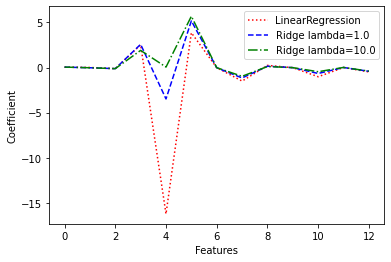

In [ ]:
plt.plot(linear1.coef_, label='LinearRegression', color='r', linestyle=':')
plt.plot(linear2.coef_, label='Ridge lambda=1.0', color='b', linestyle='--')
plt.plot(linear3.coef_, label='Ridge lambda=10.0', color='g', linestyle='-.')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Coefficient', fontsize=10)
plt.legend();

In [ ]:
y_pred_linear_tr=X_train@linear1.coef_+linear1.intercept_
y_pred_ridge_1_tr=X_train@linear2.coef_+linear2.intercept_
y_pred_ridge_10_tr=X_train@linear3.coef_+linear3.intercept_

y_pred_linear_ts=X_test@linear1.coef_+linear1.intercept_
y_pred_ridge_1_ts=X_test@linear2.coef_+linear2.intercept_
y_pred_ridge_10_ts=X_test@linear3.coef_+linear3.intercept_

from sklearn.metrics import mean_squared_error
print('Ridge parameter 1.0 MSE train:%.3f, test:%.3f' %(mean_squared_error(y_train,y_pred_ridge_1_tr),mean_squared_error(y_test,y_pred_ridge_1_ts)))
print('Ridge parameter 10.0 MSE train:%.3f, test:%.3f' %(mean_squared_error(y_train,y_pred_ridge_10_tr),mean_squared_error(y_test,y_pred_ridge_10_ts)))
print('Linear regression MSE train:%.3f, test:%.3f' %(mean_squared_error(y_train,y_pred_linear_tr),mean_squared_error(y_test,y_pred_linear_ts)))

Ridge parameter 1.0 MSE train:20.999, test:28.303
Ridge parameter 10.0 MSE train:22.186, test:29.085
Linear regression MSE train:19.958, test:27.196
